# Structural Estimation of the Buffer-Stock Model

## Setup

In [39]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy.optimize import minimize
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Buffer-Stock Consumption-Saving Model

In [40]:
# load local model file and initialize model class
from BufferStockModel import BufferStockModelClass
model = BufferStockModelClass()

## Solve the model

In [41]:
model.solve()
par = model.par
sol = model.sol

**Grid:** $\overrightarrow{m}$

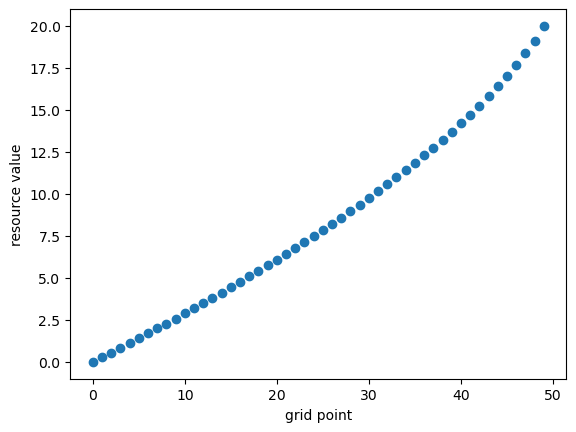

In [42]:
fig, ax = plt.subplots()
ax.scatter(range(par.Nm),par.m_grid)
ax.set(xlabel='grid point',ylabel='resource value');

In [43]:
#Gauss-Hermite nodes and weights for numerical integration
print('Permanent income shock (psi):')
for i_psi,psi in enumerate(par.psi_grid):
    print(f'{par.psi_grid[i_psi]:2.3f} w. prob. {par.psi_weight[i_psi]:2.3f}')
print(f'Mean is {par.psi_grid.T @ par.psi_weight} (close to what it should be, 1) \n')


print('Transitory income shock (xi):')
for i_xi,xi in enumerate(par.xi_grid):
    print(f'{par.xi_grid[i_xi]:2.3f} w. prob. {par.xi_weight[i_xi]:2.3f}')
print(f'Mean is {par.xi_grid.T @ par.xi_weight} (close to what it should be, 1)')

Permanent income shock (psi):
0.748 w. prob. 0.011
0.869 w. prob. 0.222
0.995 w. prob. 0.533
1.139 w. prob. 0.222
1.324 w. prob. 0.011
Mean is 0.9999999999999978 (close to what it should be, 1) 

Transitory income shock (xi):
0.748 w. prob. 0.011
0.869 w. prob. 0.222
0.995 w. prob. 0.533
1.139 w. prob. 0.222
1.324 w. prob. 0.011
Mean is 0.9999999999999978 (close to what it should be, 1)


**Last period, $t=T-1$**

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zt/5m4wvxh535lc12y4ttsgzt2m0000gn/T/ipykernel_88184/4143240027.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.set(xlabel='Resources, $m_{T-1}$',ylabel='Consumption, $c_{T-1}^{\star}$');


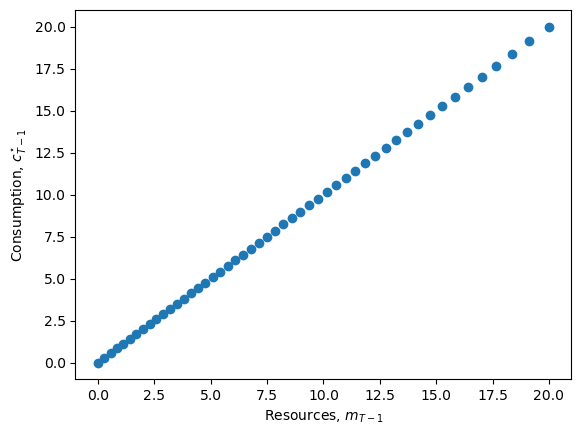

In [44]:
# last period consumption
t = par.T-1
fig, ax = plt.subplots()
ax.scatter(par.m_grid,sol.c[t,:])
ax.set(xlabel='Resources, $m_{T-1}$',ylabel='Consumption, $c_{T-1}^{\star}$');

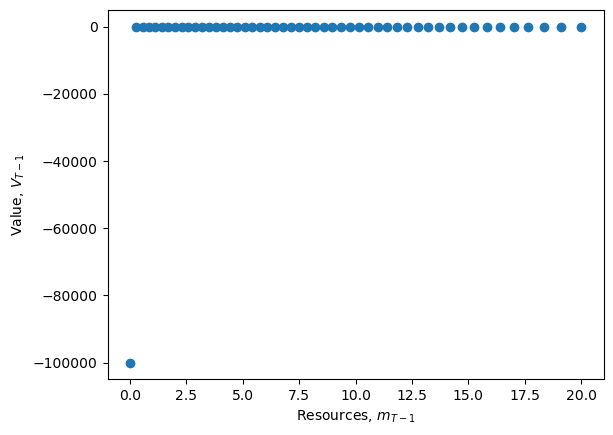

In [45]:
fig, ax = plt.subplots()
ax.scatter(par.m_grid,sol.V[t,:])
ax.set(xlabel='Resources, $m_{T-1}$',ylabel='Value, $V_{T-1}$');

**Question 1:** Why does the value function look like this? <br> \[*hint:* try plotting all but the first point in the grid.\]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zt/5m4wvxh535lc12y4ttsgzt2m0000gn/T/ipykernel_88184/3398230340.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.set(xlabel='Resources, $m_{0}$',ylabel='Consumption, $c_{0}^{\star}$');


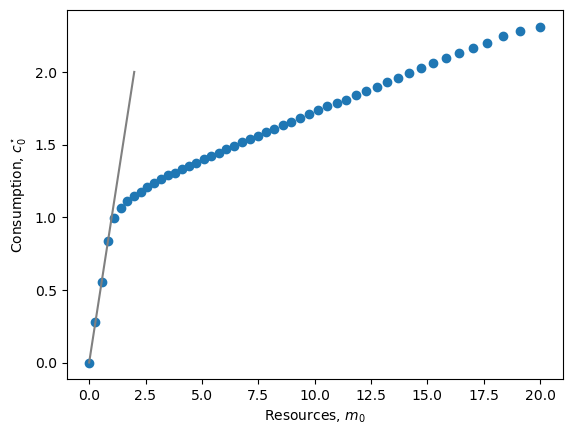

In [46]:
t = 0
fig, ax = plt.subplots()
ax.scatter(par.m_grid,sol.c[t,:])
ax.plot([0,2],[0,2],color='gray')
ax.set(xlabel='Resources, $m_{0}$',ylabel='Consumption, $c_{0}^{\star}$');

## In-class exercise

1. Look at the code and talk about it with the person next to you for 5 minutes
2. Write at least one question

## Simulation

With the solution at hand we can now simulate `simN` synthetic individuals for `simT` periods. We do so by drawing transitory and permanent income shocks, `sim.xi` and `sim.psi`, from log normal distributions and initializing all state-variables in the first period and simulate forwards. 

We wish to simulate both normalized and un-normalized variables. We therefore have two state variables to initialize, wealth ($a_0$) and permanent income ($P_0$). We could also have initialized $m_0$ and $P_0$ but it feels more natural to initialize the level of wealth. 

We initilize all individuals with no wealth, `sim.a_init=np.zeros(par.simN)` and permanent income of 1, `sim.P_init=np.ones(par.simN)`. We can then construct $Y_{i,0}$ and $A_{i,0}$ and loop forward using the solution:
$$
\begin{align}
M_{i,t} &= (1+r)\cdot A_{i,t}  + Y_{i,t}\\
m_{i,t} &= M_{i,t}/P_{i,t} \\
c_{i,t} &= \check{c}_t^{\star}(m_{i,t}) \\
a_{i,t+1} &= m_{i,t} - c_{i,t} \\
P_{i,t+1} &= G\cdot P_{i,t} \cdot \psi_{i,t+1} \\
Y_{i,t+1} &= P_{i,t+1} \cdot \xi_{i,t+1} \\
\end{align}
$$

In [47]:
model.simulate()
sim = model.sim

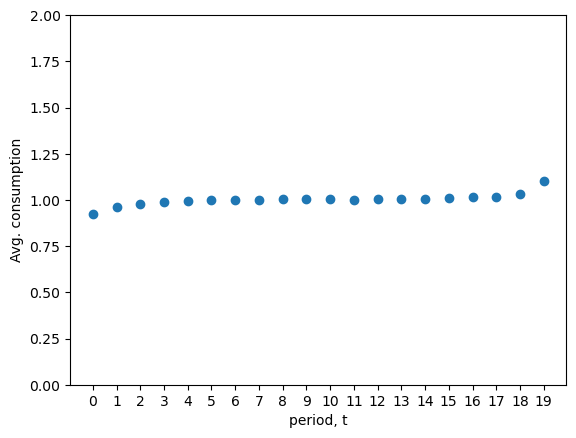

In [48]:
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(sim.c,axis=0))
ax.set(xlabel='period, t',ylabel='Avg. consumption',ylim=[0,2],xticks=range(par.simT));

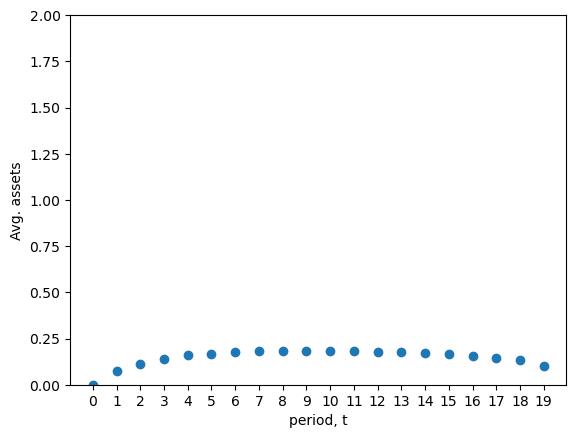

In [49]:
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(sim.a,axis=0))
ax.set(xlabel='period, t',ylabel='Avg. assets',ylim=[0,2],xticks=range(par.simT));

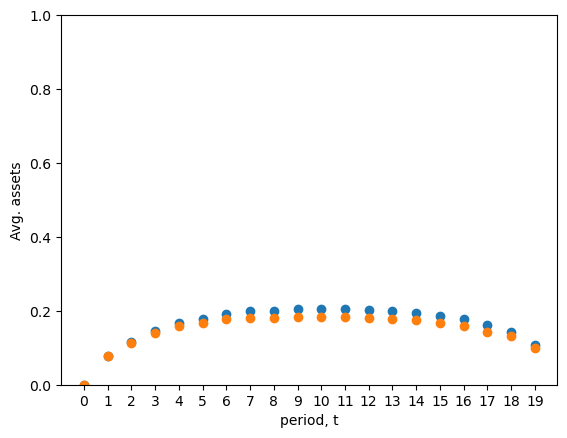

In [54]:
model_99=BufferStockModelClass(par={'beta':0.99})
model_99.solve()
model_99.simulate()

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(model_99.sim.a,axis=0))
ax.scatter(range(par.simT),np.mean(sim.a,axis=0))
ax.set(xlabel='period, t',ylabel='Avg. assets',ylim=[0,1],xticks=range(par.simT));

## In-class exercise

1. Look at the code and talk about it with the person next to you for 5 minutes
2. Write at least one question
3. Simulate average wealth with a larger discount factor of, say, $\beta=0.99$. Does the savings behavior change in an intuitive way?

## Structural Estimation of $\theta=(\beta,\rho)$

In [55]:
def obj_func(theta,theta_names,mom_data,model,do_print=False): 
    
    # printing
    if do_print: 
        print_str = ''
        for i,name in enumerate(theta_names):
            print_str += f'{name}={theta[i]:2.3f} '
        print(print_str)
            
    # calculate moments from simulation
    mom_sim = simulate_moments(theta,theta_names,model,do_print=False)
    
    # equal weighting
    obj = np.sum((mom_data - mom_sim)**2)
    
    # return objective and moments for plotting
    return obj

def simulate_moments(theta,theta_names,model,do_print=False):
        
    # update parameters
    for i,name in enumerate(theta_names):
        setattr(model.par,name,theta[i]) 
    
    # solve and simulate model with these parameters
    model.solve()
    model.simulate()
    
    # return moments from simulated data
    return moment_func(model.sim)

def moment_func(input_data):
    return np.mean(input_data.A,axis=0) # age profile of wealth

In [56]:
# simulate synthetic data with a known set of parameters. 
beta_true = 0.98
rho_true = 2.0

data_model = BufferStockModelClass(par={'beta':beta_true,'rho':rho_true})

data_model.solve()
data_model.simulate()

mom_data = moment_func(data_model.sim) # moments in data

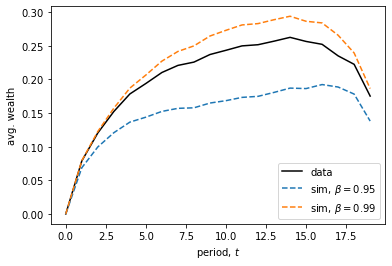

In [28]:
# Plot the different age-profiles for different values of, say, beta. the profiles are the 2.and 3. ourput from obj_func
mom_sim_95 = simulate_moments(np.array([0.95]),('beta',),model)
mom_sim_99 = simulate_moments(np.array([0.99]),('beta',),model)

fig, ax = plt.subplots()
ax.plot(range(par.simT),mom_data,label='data',color='black')
ax.plot(range(par.simT),mom_sim_95,linestyle='--',label=r'sim, $\beta=0.95$')
ax.plot(range(par.simT),mom_sim_99,linestyle='--',label=r'sim, $\beta=0.99$')
ax.set(xlabel='period, $t$',ylabel='avg. wealth')
ax.legend();

In [57]:
# evaluate objective function at truth.
# Because the seed is the same, the objective function is exactly zero.
theta_names = ('beta','rho')
theta_true = np.array([beta_true,rho_true])
obj_true = obj_func(theta_true,theta_names,mom_data,model)
obj_true

0.0

In [58]:
# plot objective function 
beta_grid = np.linspace(0.95,1.0,7)
rho_grid = np.linspace(1.5,2.5,7)

obj = np.nan + np.ones((beta_grid.size,rho_grid.size))
for ibeta,beta in enumerate(beta_grid):
    for irho,rho in enumerate(rho_grid):
        theta = [beta,rho]
        obj[ibeta,irho] = obj_func(theta,theta_names,mom_data,model)

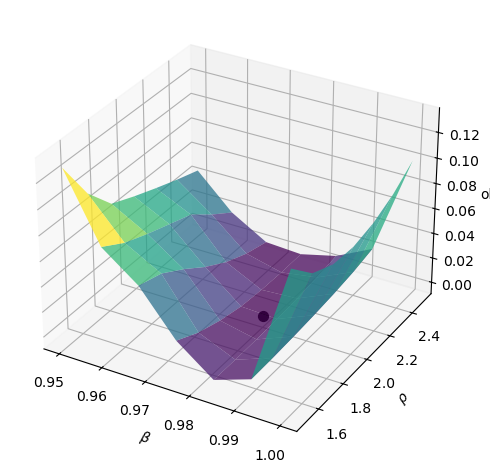

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(beta_grid, rho_grid,indexing='ij')
Z = obj

ax.plot_surface(X, Y, Z,rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.scatter(beta_true,rho_true,obj_true,color='black',s=50)
ax.set(xlabel=r'$\beta$',ylabel=r'$\rho$',zlabel='obj');
plt.tight_layout()
plt.savefig('objective.pdf')  

In [60]:
# call numerical optimizer
objective = lambda theta: obj_func(theta,theta_names,mom_data,model,do_print=True)

theta_init = np.array([beta_true,rho_true]) * 0.98

res = minimize(objective,theta_init,method='nelder-mead')
res

beta=0.960 rho=1.960 
beta=1.008 rho=1.960 
beta=0.960 rho=2.058 
beta=0.912 rho=2.058 
beta=0.936 rho=2.033 
beta=0.984 rho=1.985 
beta=1.008 rho=1.960 
beta=0.984 rho=2.083 
beta=1.008 rho=2.009 
beta=0.972 rho=2.046 
beta=0.996 rho=2.021 
beta=0.978 rho=2.040 
beta=0.978 rho=1.942 
beta=0.972 rho=1.997 
beta=0.981 rho=1.988 
beta=0.981 rho=2.086 
beta=0.979 rho=1.978 
beta=0.976 rho=2.030 
beta=0.980 rho=1.998 
beta=0.981 rho=1.936 
beta=0.982 rho=1.957 
beta=0.980 rho=1.972 
beta=0.981 rho=1.962 
beta=0.980 rho=1.970 
beta=0.981 rho=1.964 
beta=0.980 rho=1.968 
beta=0.980 rho=2.030 
beta=0.980 rho=2.007 
beta=0.980 rho=1.977 
beta=0.980 rho=1.993 
beta=0.980 rho=2.031 
beta=0.980 rho=2.016 
beta=0.980 rho=2.002 
beta=0.980 rho=2.006 
beta=0.980 rho=2.028 
beta=0.980 rho=2.002 
beta=0.980 rho=2.012 
beta=0.980 rho=2.007 
beta=0.980 rho=1.993 
beta=0.980 rho=2.010 
beta=0.980 rho=1.999 
beta=0.980 rho=2.007 
beta=0.980 rho=2.002 
beta=0.980 rho=2.006 
beta=0.980 rho=2.000 
beta=0.980

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 6.961715557179495e-13
             x: [ 9.800e-01  2.000e+00]
           nit: 36
          nfev: 68
 final_simplex: (array([[ 9.800e-01,  2.000e+00],
                       [ 9.800e-01,  2.000e+00],
                       [ 9.800e-01,  2.000e+00]]), array([ 6.962e-13,  7.203e-13,  2.769e-12]))